In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
data = pd.read_csv(r'D:\Datas\drug.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [9]:
data.shape 

(200, 6)

<AxesSubplot:>

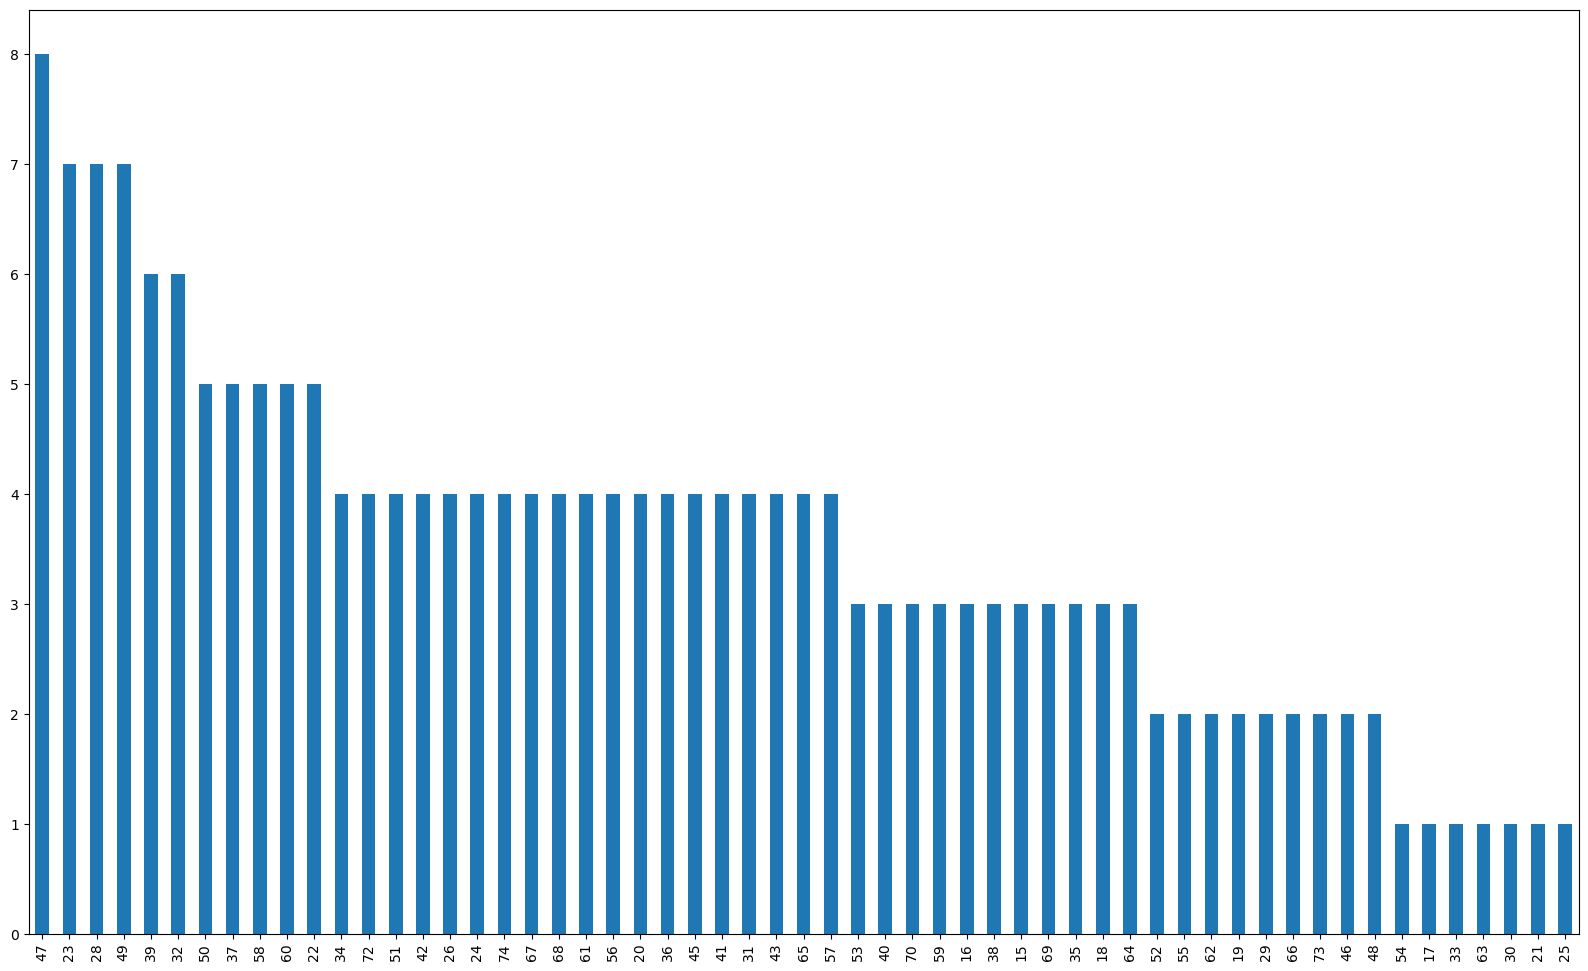

In [10]:
plt.subplots(figsize=(20,12))
data['Age'].value_counts().plot.bar()

<AxesSubplot:>

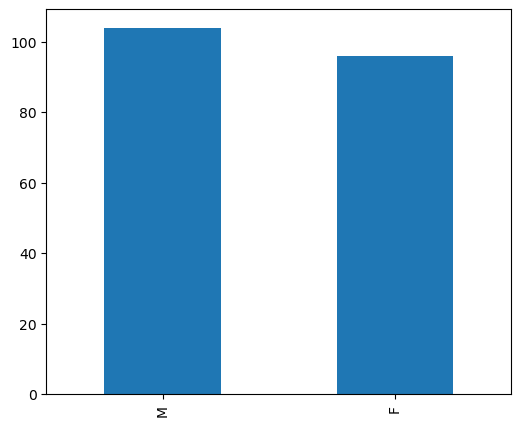

In [11]:
plt.subplots(figsize=(6,5))
data['Sex'].value_counts().plot.bar()

<AxesSubplot:>

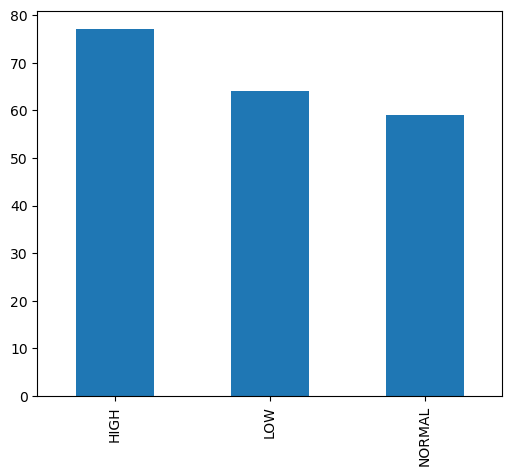

In [12]:
plt.subplots(figsize=(6,5))
data['BP'].value_counts().plot.bar()

<AxesSubplot:>

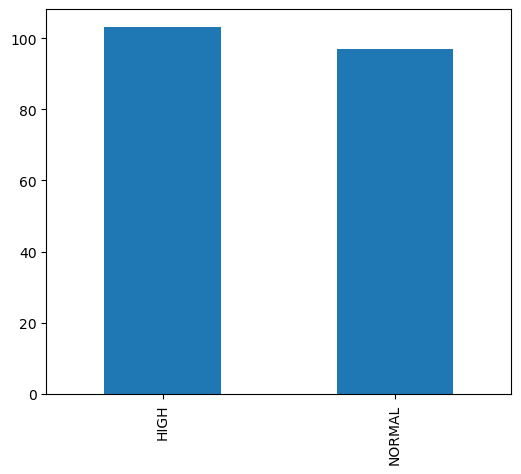

In [13]:
plt.subplots(figsize=(6,5))
data['Cholesterol'].value_counts().plot.bar()

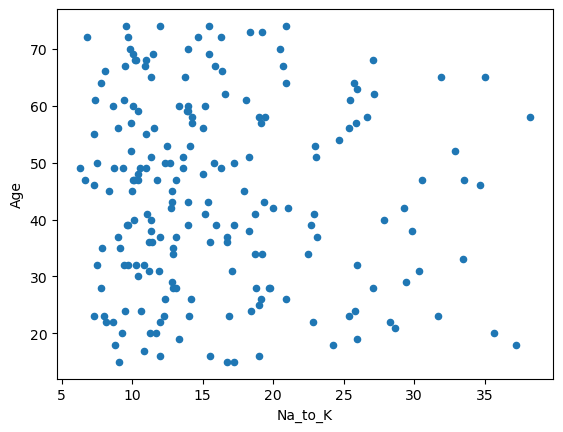

In [14]:
data.plot.scatter(x = 'Na_to_K', y = 'Age');

<AxesSubplot:>

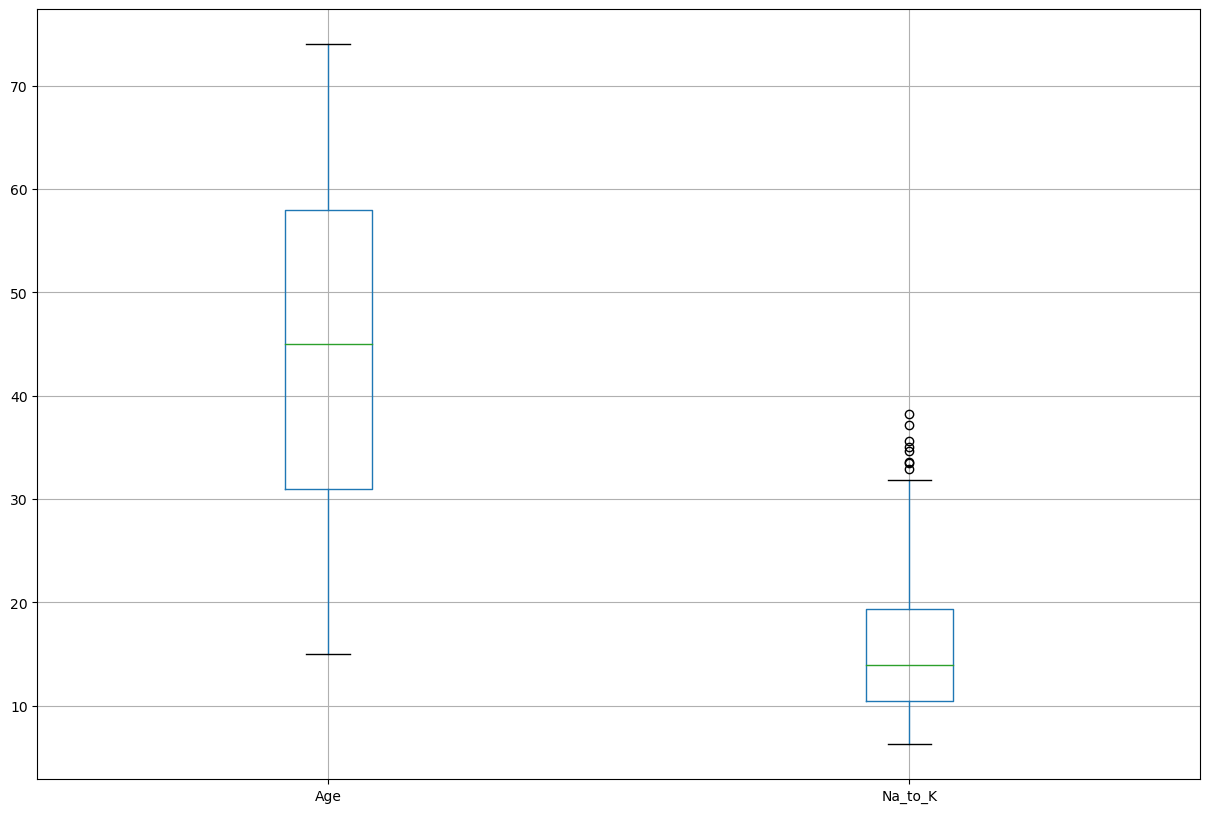

In [15]:
plt.figure(figsize=(15,10))
data.boxplot()

In [16]:
from sklearn.preprocessing import LabelEncoder
categ = ['Sex', 'BP','Cholesterol','Drug']

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [17]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [18]:
corr_matrix = data.corr()

In [19]:
corr_matrix

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


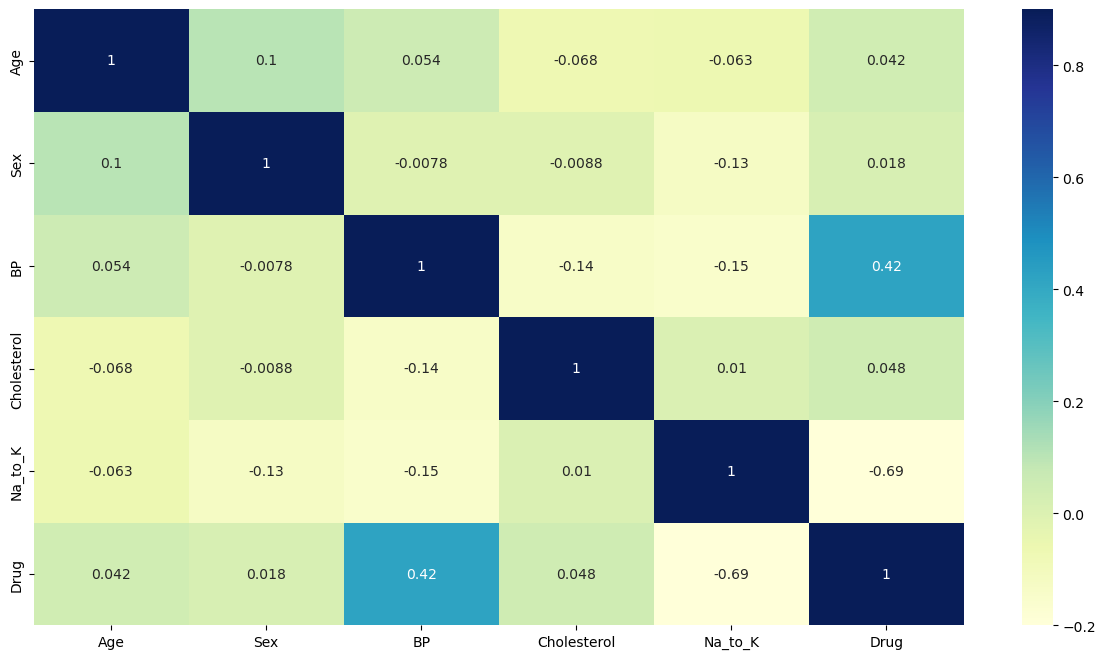

In [20]:
plt.subplots(figsize = (15,8))
sns.heatmap(corr_matrix,vmin=-0.2,vmax=0.9,annot=True,cmap='YlGnBu')
plt.show()

In [21]:
x=data.drop('Drug',axis=1)
y=data['Drug']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

In [23]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
y_pred = log_model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  1,  0,  0],
       [ 3,  3,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 2,  0,  0,  0,  4],
       [ 1,  0,  0,  0, 14]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.78

KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
metric_k=[]
neighbors = np.arange(3,15)

In [30]:
  for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric= 'euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [31]:
metric_k

[0.74, 0.7, 0.7, 0.72, 0.66, 0.74, 0.64, 0.68, 0.68, 0.68, 0.66, 0.66]

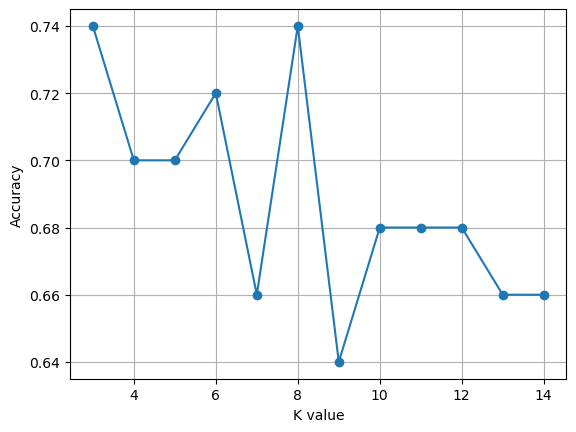

In [32]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [33]:
classifier = KNeighborsClassifier(n_neighbors=8, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
accuracy_score(y_test,y_pred_knn)

0.74

In [35]:
confusion_matrix(y_test,y_pred_knn)

array([[20,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  2],
       [ 0,  0,  1,  0,  2],
       [ 0,  1,  2,  1,  2],
       [ 0,  1,  3,  0, 11]], dtype=int64)

SVC

In [36]:
from sklearn.svm import SVC

In [37]:
svm_clf = SVC(kernel='rbf')

In [38]:
svm_model=svm_clf.fit(x_train,y_train)

In [39]:
svm_model

SVC()

In [40]:
y_pred = svm_clf.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
confusion_matrix(y_test,y_pred)

array([[20,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  3],
       [ 1,  0,  0,  0,  5],
       [ 1,  0,  0,  0, 14]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred)

0.68

Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [46]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_predc = dt_clf.predict(x_test)

In [48]:
confusion_matrix(y_test,y_predc)

array([[20,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

In [49]:
accuracy_score(y_test,y_predc)

1.0

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_clf = RandomForestClassifier(random_state=42)

In [52]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_predct = rf_clf.predict(x_test)

In [54]:
confusion_matrix(y_test,y_predct)

array([[20,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 15]], dtype=int64)

In [55]:
accuracy_score(y_test,y_predct)

1.0

In [56]:
x=data
y=data.Drug

In [57]:
x=pd.get_dummies(x)
data=pd.get_dummies(data)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

#PRINT THE PREDICTION OF THE RANDOM FOREST CLASSIFIER
pred_rf=forest.predict(x_test)
acc_rf=accuracy_score(y_test,pred_rf)*100
acc_rf

100.0

In [60]:
pred_test=forest.predict(data)

In [61]:
Sideeffectofdrug=pd.DataFrame({"Age":data["Age"],"Sideeffectofdrug":pred_test})


In [62]:
Sideeffectofdrug

,Age,Sideeffectofdrug
0,23,0
1,47,3
2,47,3
3,28,4
4,61,0
...,...,...
195,56,3
196,16,3
197,52,4
198,23,4


In [63]:
Sideeffectofdrug=pd.DataFrame({"Sex":data["Sex"],"Sideeffectofdrug":pred_test})

In [64]:
Sideeffectofdrug

,Sex,Sideeffectofdrug
0,0,0
1,1,3
2,1,3
3,0,4
4,0,0
...,...,...
195,0,3
196,1,3
197,1,4
198,1,4
